In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sp_tracks = pd.read_csv('tracks.csv')
sp_artists = pd.read_csv('artists.csv')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
sp_tracks.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [6]:
sp_artists.head()

,id,followers,genres,name,popularity
0,0DheY5irMjBUeLybbCUEZ2,0.0,[],Armid & Amir Zare Pashai feat. Sara Rouzbehani,0
1,0DlhY15l3wsrnlfGio2bjU,5.0,[],ปูนา ภาวิณี,0
2,0DmRESX2JknGPQyO15yxg7,0.0,[],Sadaa,0
3,0DmhnbHjm1qw6NCYPeZNgJ,0.0,[],Tra'gruda,0
4,0Dn11fWM7vHQ3rinvWEl4E,2.0,[],Ioannis Panoutsopoulos,0


In [7]:
pd.isnull(sp_tracks).sum()

,0
id,0
name,71
popularity,0
duration_ms,0
explicit,0
artists,0
id_artists,0
release_date,0
danceability,0
energy,0


In [8]:
pd.isnull(sp_artists).sum()

,0
id,0
followers,13
genres,0
name,3
popularity,0


In [9]:
sp_tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586672 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586672 non-null  int64  
 3   duration_ms       586672 non-null  int64  
 4   explicit          586672 non-null  int64  
 5   artists           586672 non-null  object 
 6   id_artists        586672 non-null  object 
 7   release_date      586672 non-null  object 
 8   danceability      586672 non-null  float64
 9   energy            586672 non-null  float64
 10  key               586672 non-null  int64  
 11  loudness          586672 non-null  float64
 12  mode              586672 non-null  int64  
 13  speechiness       586672 non-null  float64
 14  acousticness      586672 non-null  float64
 15  instrumentalness  586672 non-null  float64
 16  liveness          58

In [10]:
sp_artists.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1104349 entries, 0 to 1104348
Data columns (total 5 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   id          1104349 non-null  object 
 1   followers   1104336 non-null  float64
 2   genres      1104349 non-null  object 
 3   name        1104346 non-null  object 
 4   popularity  1104349 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 42.1+ MB


In [11]:
a=sp_tracks.sort_values('popularity',ascending=True)[0:10]
a[['name','popularity']]

,name,popularity
135236,My Wubba Dolly,0
135230,In The Royal Hawaiian Hotel,0
135229,Am I Dreaming?,0
135228,Movin' the boogie,0
135227,Alibi Baby,0
135226,If somebody would only love me,0
135225,If the Man In the Moon Were a Coon,0
135224,It All Comes Back to Me Now,0
135223,Hyena stomp,0
135222,Now You've Got Me Worryin' for You,0


In [12]:
sp_tracks.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
popularity,586672.0,27.570053,18.370642,0.0,13.0000,27.000000,41.00000,100.000
duration_ms,586672.0,230051.167286,126526.087418,3344.0,175093.0000,214893.000000,263867.00000,5621218.000
explicit,586672.0,0.044086,0.205286,0.0,0.0000,0.000000,0.00000,1.000
danceability,586672.0,0.563594,0.166103,0.0,0.4530,0.577000,0.68600,0.991
energy,586672.0,0.542036,0.251923,0.0,0.3430,0.549000,0.74800,1.000
key,586672.0,5.221603,3.519423,0.0,2.0000,5.000000,8.00000,11.000
loudness,586672.0,-10.206067,5.089328,-60.0,-12.8910,-9.243000,-6.48200,5.376
mode,586672.0,0.658797,0.474114,0.0,0.0000,1.000000,1.00000,1.000
speechiness,586672.0,0.104864,0.179893,0.0,0.0340,0.044300,0.07630,0.971
acousticness,586672.0,0.449863,0.348837,0.0,0.0969,0.422000,0.78500,0.996


In [13]:
a=sp_tracks
b=a[a['popularity']>90].sort_values('popularity',ascending=False)[:10]
b[['name','popularity','artists']]

,name,popularity,artists
93802,Peaches (feat. Daniel Caesar & Giveon),100,"['Justin Bieber', 'Daniel Caesar', 'Giveon']"
93803,drivers license,99,['Olivia Rodrigo']
93804,Astronaut In The Ocean,98,['Masked Wolf']
92811,telepatía,97,['Kali Uchis']
92810,Save Your Tears,97,['The Weeknd']
92813,Blinding Lights,96,['The Weeknd']
93805,Leave The Door Open,96,"['Bruno Mars', 'Anderson .Paak', 'Silk Sonic']"
92814,The Business,95,['Tiësto']
91866,Streets,94,['Doja Cat']
93806,Fiel,94,"['Los Legendarios', 'Wisin', 'Jhay Cortez']"


In [14]:
sp_tracks.set_index('release_date', inplace=True)
sp_tracks.index = pd.to_datetime(sp_tracks.index, errors='coerce', format='mixed')
years = sp_tracks.index.year
sp_tracks.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
release_date,,,,,,,,,,,,,,,,,,,
1922-02-22,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1922-06-01,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
1922-03-21,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
1922-03-21,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
1922-01-01,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [15]:
sp_tracks[['artists']].iloc[18]

,1922-01-01
artists,['Victor Boucher']


In [16]:
sp_tracks['duration'] = sp_tracks['duration_ms'].apply (lambda x : round(x/1000))
sp_tracks.drop('duration_ms', inplace = True, axis=1)
sp_tracks.duration.head()

,duration
release_date,
1922-02-22,127
1922-06-01,98
1922-03-21,182
1922-03-21,177
1922-01-01,163


[Text(0.5, 0, 'popularity'),
 Text(1.5, 0, 'explicit'),
 Text(2.5, 0, 'danceability'),
 Text(3.5, 0, 'energy'),
 Text(4.5, 0, 'key'),
 Text(5.5, 0, 'loudness'),
 Text(6.5, 0, 'mode'),
 Text(7.5, 0, 'speechiness'),
 Text(8.5, 0, 'acousticness'),
 Text(9.5, 0, 'instrumentalness'),
 Text(10.5, 0, 'liveness'),
 Text(11.5, 0, 'valence'),
 Text(12.5, 0, 'tempo'),
 Text(13.5, 0, 'time_signature'),
 Text(14.5, 0, 'duration')]

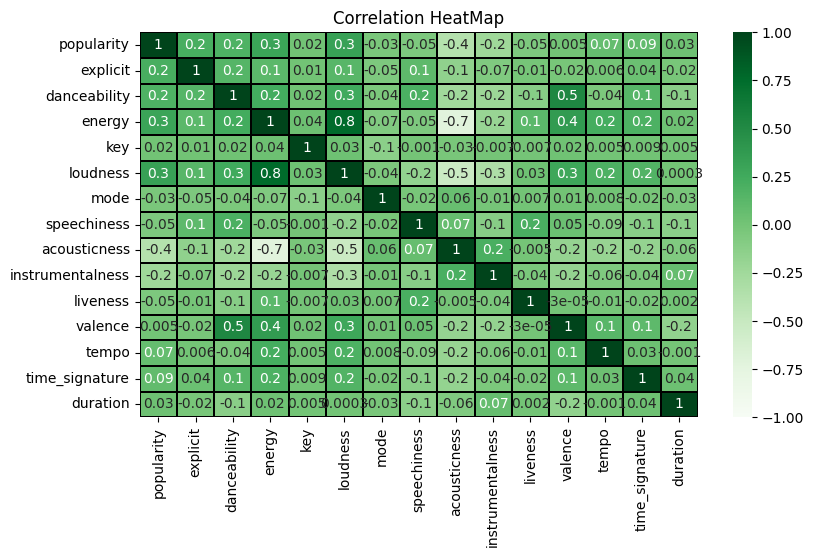

In [17]:
td = sp_tracks.select_dtypes(include='number').corr(method='pearson')
plt.figure(figsize=(9,5))
hmap = sns.heatmap(td, annot = True, fmt = '.1g', vmin=-1, vmax=1, center=0, cmap='Greens', linewidths=0.1, linecolor='black')
hmap.set_title('Correlation HeatMap')
hmap.set_xticklabels(hmap.get_xticklabels(), rotation=90)

In [18]:
sample_sp=sp_tracks.sample(int(0.004*len(sp_tracks)))
print(len(sample_sp))

2346


[Text(0.5, 1.0, 'Regression Plot - Loudness vs Energy Correlation')]

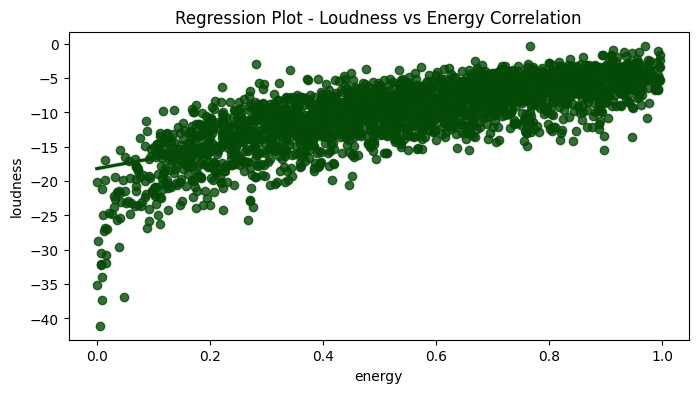

In [19]:
plt.figure(figsize=(8,4))
sns.regplot(data=sample_sp, y='loudness', x='energy', color='#054907').set(title='Regression Plot - Loudness vs Energy Correlation')

[Text(0.5, 1.0, 'Regression Plot - Popularity vs Acousticness Correlation')]

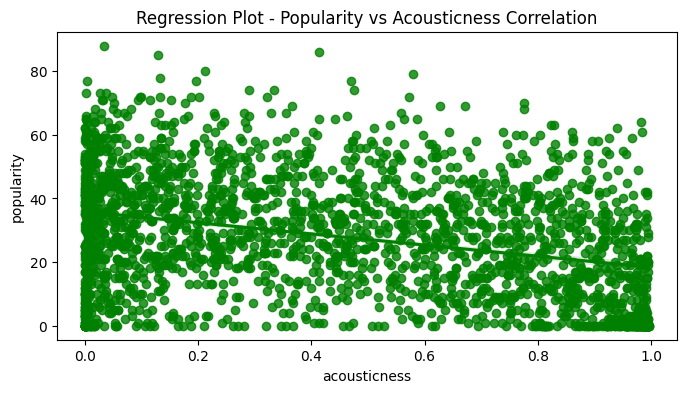

In [20]:
plt.figure(figsize=(8,4))
sns.regplot(data=sample_sp, y='popularity', x='acousticness', color='#008000').set(title='Regression Plot - Popularity vs Acousticness Correlation')

In [21]:
sp_tracks['dates']=sp_tracks.index.get_level_values('release_date')
sp_tracks.dates=pd.to_datetime(sp_tracks.dates)
years=sp_tracks.dates.dt.year
sp_tracks.head()

,id,name,popularity,explicit,artists,id_artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration,dates
release_date,,,,,,,,,,,,,,,,,,,,
1922-02-22,35iwgR4jXetI318WEWsa1Q,Carve,6,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3,127,1922-02-22
1922-06-01,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1,98,1922-06-01
1922-03-21,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5,182,1922-03-21
1922-03-21,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3,177,1922-03-21
1922-01-01,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4,163,1922-01-01


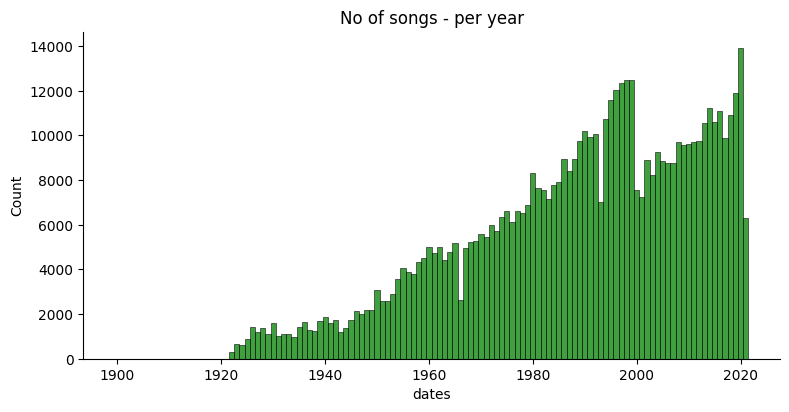

In [22]:
sns.displot(years, discrete=True, aspect=2, height=4, kind='hist',color='g').set(title='No of songs - per year')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100],
 [Text(0, 0, '1900'),
  Text(1, 0, '1922'),
  Text(2, 0, '1923'),
  Text(3, 0, '1924'),
  Text(4, 0, '1925'),
  Text(5, 0, '1926'),
  Text(6, 0, '1927'),
  Text(7, 0, '1928'),
  Text(8, 0, '1929'),
  Text(9, 0, '1930'),
  Text(10, 0, '1931'),
  Text(11, 0, '1932'),
  Text(12, 0, '1933'),
  Text(13, 0, '1934'),
  Text(14, 0, '1935'),
  Text(15, 0, '1936'),
  Text(16, 0, '1937'),
  Text(17, 0, '1938')

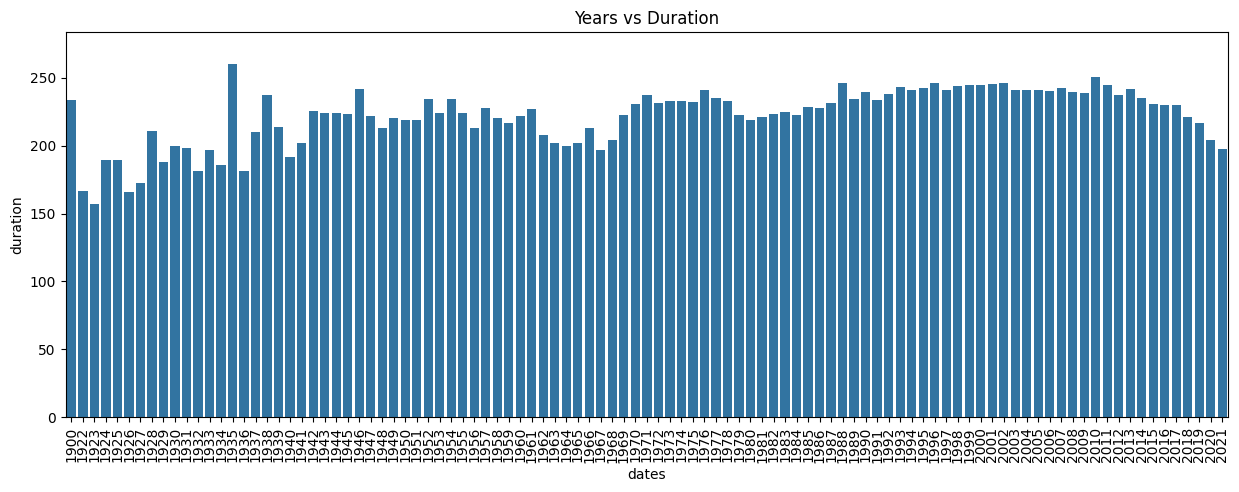

In [23]:
total_dr = sp_tracks.duration
fig_dims = (15,5)
fig, ax = plt.subplots(figsize=fig_dims)
fig = sns.barplot(x = years, y = total_dr, ax = ax, err_kws={'linewidth': False}).set(title='Years vs Duration')
plt.xticks(rotation=90)

In [24]:
sp_tracks['id_artists_clean'] = sp_tracks['id_artists'].str.strip("[]'\"").str.split(',').str[0]

In [25]:
merged_df = sp_tracks.merge(sp_artists[['id', 'genres']], left_on='id_artists_clean', right_on='id')

In [26]:
merged_df.head()

,id_x,name,popularity,explicit,artists,id_artists,danceability,energy,key,loudness,...,instrumentalness,liveness,valence,tempo,time_signature,duration,dates,id_artists_clean,id_y,genres
0,35iwgR4jXetI318WEWsa1Q,Carve,6,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],0.645,0.4450,0,-13.338,...,0.7440,0.151,0.127,104.851,3,127,1922-02-22,45tIt06XoI0Iio4LBEVpls,45tIt06XoI0Iio4LBEVpls,[]
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],0.695,0.2630,0,-22.136,...,0.0000,0.148,0.655,102.009,1,98,1922-06-01,14jtPCOoNZwquk5wd9DxrY,14jtPCOoNZwquk5wd9DxrY,[]
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],0.434,0.1770,1,-21.180,...,0.0218,0.212,0.457,130.418,5,182,1922-03-21,5LiOoJbxVSAMkBS2fUm3X2,5LiOoJbxVSAMkBS2fUm3X2,"['tango', 'vintage tango']"
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],0.321,0.0946,7,-27.961,...,0.9180,0.104,0.397,169.980,3,177,1922-03-21,5LiOoJbxVSAMkBS2fUm3X2,5LiOoJbxVSAMkBS2fUm3X2,"['tango', 'vintage tango']"
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],0.402,0.1580,3,-16.900,...,0.1300,0.311,0.196,103.220,4,163,1922-01-01,3BiJGZsyX9sJchTqcSA7Su,3BiJGZsyX9sJchTqcSA7Su,"['adult standards', 'big band', 'easy listenin..."


In [27]:
genre_duration = merged_df.groupby('genres')['duration'].sum().sort_values(ascending=False).reset_index()

top_genres = genre_duration.head(10)

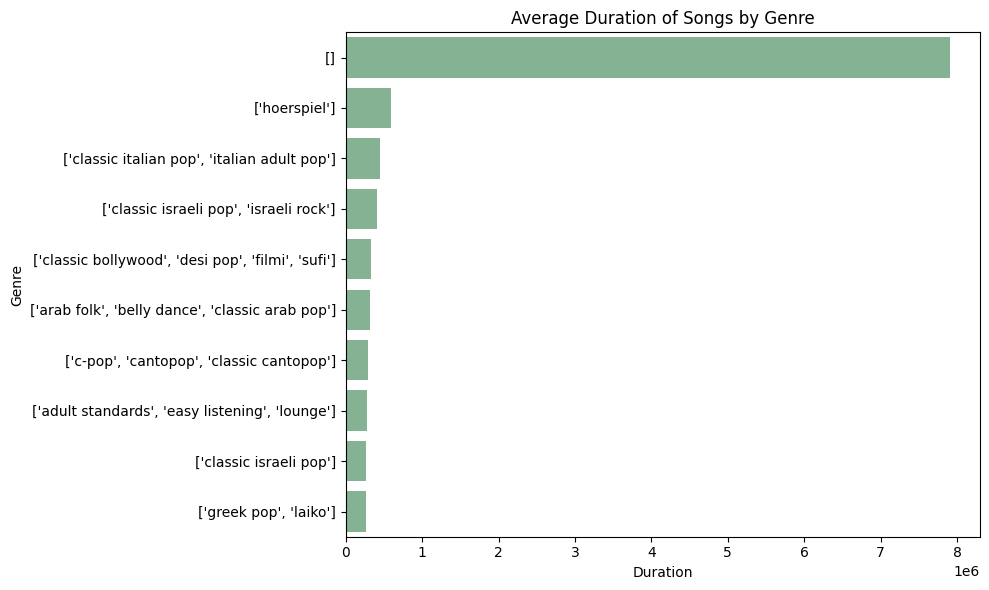

In [28]:
plt.figure(figsize=(10, 6))
sns.set_palette('crest')

sns.barplot(y='genres', x='duration', data=top_genres)

plt.title('Average Duration of Songs by Genre')
plt.xlabel('Duration')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

[Text(0.5, 1.0, 'Genres by Popularity-Top 5')]

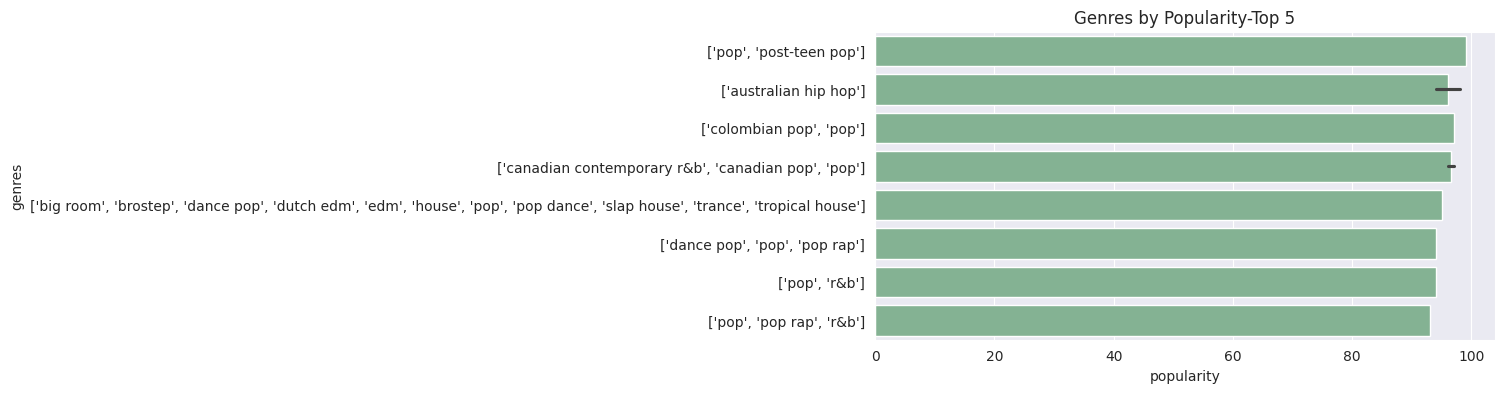

In [29]:
sns.set_style(style='darkgrid')
plt.figure(figsize=(8,4))
Top = merged_df.sort_values('popularity', ascending=False)[:10]
sns.barplot(y = 'genres', x = 'popularity', data = Top).set(title='Genres by Popularity-Top 5')